In [1]:
import matplotlib.pyplot as plt, numpy as np, numpy.random as npr, matplotlib.pyplot as plt
import timeit, scipy, seaborn as sns, gc
from sklearn.cluster import SpectralClustering
from tqdm import trange
%matplotlib inline
from pylab import plot, show, legend
gc.enable()

In [2]:
latent_samples_sorted = np.load('/xtmp/BNN_dim_red_data/banknote_latent_samples.npy')
N, n_samples = np.shape(latent_samples_sorted)[0:2]

In [4]:
for k in trange(n_samples) :
    try:
        clustering = SpectralClustering(n_clusters=2,assign_labels="discretize",
                                        random_state=0).fit(latent_samples_sorted[:,k])
        pw = np.zeros((N,N))
        for i in range(N) :
            pw[i] = (clustering.labels_[i] == clustering.labels_)/n_samples
        filename = '/xtmp/BNN_dim_red_data/banknote_clustering/clustering'+str(k)+'.npy'
        np.save(filename, pw)
        del clustering, pw
    except:
        pass

100%|██████████| 5000/5000 [26:25<00:00,  3.31it/s]  


In [5]:
pw_prob = np.zeros((N,N))
for k in trange(n_samples) :
    filename = '/xtmp/BNN_dim_red_data/banknote_clustering/clustering'+str(k)+'.npy'
    pw_prob = pw_prob + np.load(filename)
    
error = np.zeros(n_samples)
for k in trange(n_samples) :
    filename = '/xtmp/BNN_dim_red_data/banknote_clustering/clustering'+str(k)+'.npy'
    error[k] = np.linalg.norm(pw_prob-np.load(filename))

100%|██████████| 5000/5000 [00:52<00:00, 95.92it/s] 


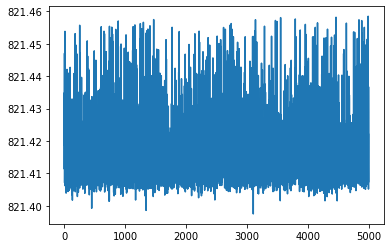

In [6]:
plt.plot(error)

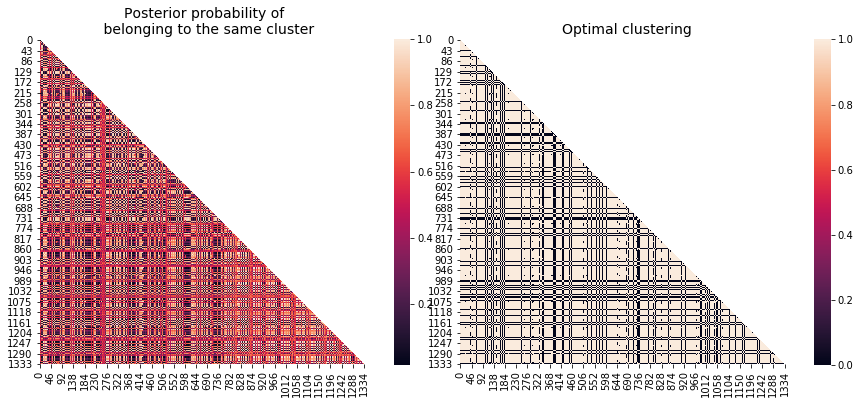

In [8]:
c_idx = np.argmin(error)
filename = '/xtmp/BNN_dim_red_data/banknote_clustering/clustering'+str(c_idx)+'.npy'
cluster_optim = np.load(filename)*n_samples
mask = np.zeros_like(pw_prob)
mask[np.triu_indices_from(mask)] = True
fig = plt.figure(figsize=(15,6))
plt.subplot(121)
ax = sns.heatmap(pw_prob, mask=mask, square=True)
plt.title("Posterior probability of \n belonging to the same cluster", fontsize=14)
plt.subplot(122)
ax = sns.heatmap(cluster_optim, mask=mask, square=True)
plt.title("Optimal clustering", fontsize=14)
plt.subplots_adjust(wspace=1e-2)
plt.savefig('/xtmp/BNN_dim_red_data/banknote_clustering.jpeg', dpi=1000, box_inches='tight')